In [25]:
# import libraries
import torch
import torchvision
import numpy
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
from torchvision import transforms
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
#mount for saving data

device(type='cuda')

**Prepare the dataset**

In [39]:
dataset = CIFAR100(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
  # trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  # trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
train_index = list(range(0, 40000))
valid_index = list(range(40000,50000))

trainloader = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset, train_index), batch_size=10, shuffle=True, num_workers=1)
validloader = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset, valid_index), batch_size=10, shuffle=True, num_workers=1)


trainloader_256 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset, train_index), batch_size=256, shuffle=True, num_workers=1)
validloader_256 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset, valid_index), batch_size=256, shuffle=True, num_workers=1)


#data augmentation
torch.manual_seed(123)
transform_T = transforms.Compose([
                                transforms.RandomRotation(30),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
angle = random.choice([15, 45,60,120,160,240,270])
transform_U = transforms.Compose([
                                transforms.RandomRotation(angle),
                                transforms.RandomVerticalFlip(),
                                transforms.ToTensor()])

dataset_T = CIFAR100(root='./data', train=True,
                                        download=True, transform=transform_T)

dataset_U = CIFAR100(root='./data', train=True,
                                        download=True, transform=transform_U)
  # trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  # trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
train_index = list(range(0, 40000))
valid_index = list(range(40000,50000))

train_indexS = list(range(0, 90000))
valid_indexS = list(range(90000,100000))

train_indexSU = list(range(0, 140000))
valid_indexSU = list(range(140000,150000))

trainloader_T = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_T, train_index), batch_size=10, shuffle=True, num_workers=1)
validloader_T = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_T, valid_index), batch_size=10, shuffle=True, num_workers=1)

dataset_S = torch.utils.data.ConcatDataset([dataset, dataset_T])
trainloader_S = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, train_indexS), batch_size=10, shuffle=True, num_workers=1)
validloader_S = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, valid_indexS), batch_size=10, shuffle=True, num_workers=1)

dataset_SU = torch.utils.data.ConcatDataset([dataset_S, dataset_U])
trainloader_SU = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_SU, train_indexSU), batch_size=10, shuffle=True, num_workers=1)
validloader_SU = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_SU, valid_indexSU), batch_size=10, shuffle=True, num_workers=1)

trainloader_S_128 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, train_indexS), batch_size=128, shuffle=True, num_workers=1)
validloader_S_128 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, valid_indexS), batch_size=128, shuffle=True, num_workers=1)


trainloader_S_256 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, train_indexS), batch_size=256, shuffle=True, num_workers=1)
validloader_S_256 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, valid_indexS), batch_size=256, shuffle=True, num_workers=1)

trainloader_SU_256 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_SU, train_indexSU), batch_size=256, shuffle=True, num_workers=1)
validloader_SU_256 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_SU, valid_indexSU), batch_size=256, shuffle=True, num_workers=1)

trainloader_S_512 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, train_indexS), batch_size=512, shuffle=True, num_workers=1)
validloader_S_512 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_S, valid_indexS), batch_size=512, shuffle=True, num_workers=1)

trainloader_SU_512 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_SU, train_indexSU), batch_size=512, shuffle=True, num_workers=1)
validloader_SU_512 = torch.utils.data.DataLoader(torch.utils.data.Subset(dataset_SU, valid_indexSU), batch_size=512, shuffle=True, num_workers=1)


testset = CIFAR100(root='./data', train=False,
                                        download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


# Model Definitions

**One Layer Network**

In [4]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    # self.layers = nn.Sequential(
    #   nn.Linear(3072, 100)
    # )
    self.linear1 = nn.Linear(3072, 100)


  def forward(self, x):
    '''Forward pass'''
    x = x.view(-1,3072)
    return self.linear1(x)

**Small Convolutional Network(not working well)**

In [5]:
#CNN1('kaiming_uniform','y',3,0)
class CNN1(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self,initialization, batchnorm, num_hidden, dropout):
        super().__init__()
        if(batchnorm == 'n' and num_hidden == 3):
          print('A')
          self.net = nn.Sequential(
              nn.Conv2d(3, 24, kernel_size=3, padding='same'),
              nn.ReLU(),
              # nn.MaxPool2d(2, 2),
              nn.Dropout(dropout),
              nn.Conv2d(24, 48, kernel_size=3),
              nn.ReLU(),
              nn.Dropout(dropout),


              nn.Conv2d(48,96, kernel_size=3, padding='same'),
              nn.ReLU(),
              nn.Dropout(dropout),


              nn.Flatten(), 
              nn.Linear(86400, 1024),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Linear(1024, 100)
          )
        if(batchnorm == 'n' and num_hidden == 2):
          print('B')

          self.net = nn.Sequential(
              nn.Conv2d(3, 24, kernel_size=3, padding='same'),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Conv2d(24, 48, kernel_size=3),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Flatten(), 
              nn.Linear(43200, 1024),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Linear(1024, 100)
          )
        if(batchnorm == 'y' and num_hidden == 3):
          print('C')

          self.net = nn.Sequential(
              nn.Conv2d(3, 24, kernel_size=3, padding='same'),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Conv2d(24, 48, kernel_size=3),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Conv2d(48,96, kernel_size=3, padding='same'),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Flatten(), 
              nn.Linear(86400, 1024),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Linear(1024, 100)
          )
        if(batchnorm == 'y' and num_hidden == 2):
          print('D')

          self.net = nn.Sequential(
              nn.Conv2d(3, 24, kernel_size=3, padding='same'),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Conv2d(24, 48, kernel_size=3),
              nn.ReLU(),
              nn.Dropout(dropout),

         


              nn.Flatten(), 
              nn.Linear(43200, 1024),
              nn.ReLU(),
              nn.Dropout(dropout),

              nn.Linear(1024, 100)
          )
          if(initialization == 'kaiming_uniform'):
            for param in self.parameters():
              if type(param) == nn.Linear:
                torch.nn.init.kaiming_uniform(param.weight)
                torch.nn.init.kaiming_uniform(param.bias)
          if(initialization == 'xavier_uniform'):
            for param in self.parameters():
              if type(param) == nn.Linear:
                torch.nn.init.xavier_uniform(param.weight) 
                torch.nn.init.xavier_uniform(param.bias)       
  def forward(self, x):
        return self.net(x)

**A better small convolutional network**

In [6]:
class CNN2(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
         nn.Conv2d(3, 60, kernel_size=3, padding='same'),
              nn.BatchNorm2d(60),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),

              nn.Conv2d(60, 120, kernel_size=3),
              nn.BatchNorm2d(120),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),

              nn.Conv2d(120,240, kernel_size=3, padding='same'),
              nn.BatchNorm2d(240),
              nn.ReLU(),

              nn.Conv2d(240,320, kernel_size=3, padding='same'),
              nn.BatchNorm2d(320),
              nn.ReLU(),

              nn.Conv2d(320,240, kernel_size=3, padding='same'),
              nn.BatchNorm2d(240),
              nn.ReLU(),

              nn.Flatten(), 
              nn.Linear(11760, 1024),
              nn.ReLU(),
              nn.Dropout(0.1),
              nn.Linear(1024, 100)
    )
    
  def forward(self, x):
    return self.net(x)

**ResNet 18**

In [7]:
# resnet
class ResNet(nn.Module):
    pass
    '''
      ResNet
    '''

    # TODO: add option for group norm
    def __init__(self):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3,
                               stride=1, padding=1)  # convolutional layer #same size      #---1
        self.bn1 = nn.BatchNorm2d(16)  # ---2
        self.activation = nn.ReLU()  # ---3
        #########################layer1################################
        # batch normalization
        # 3 convolutional
        # l1 no maxpooling, 6 layers
        self.l1_conv1_A = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---4
                                    stride=1, padding=1)
        self.l1_bn1_A = nn.BatchNorm2d(16)  # ---5
        self.l1_conv2_A = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---6
                                    stride=1, padding=1)
        self.l1_bn2_A = nn.BatchNorm2d(16)  # ---7(skip connect) NO dimension matching

        # self.l1_sc_A = just add #4

        # TODO: add skip connection
        self.l1_conv1_B = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---8
                                    stride=1, padding=1)
        self.l1_bn1_B = nn.BatchNorm2d(16)  # ---9
        self.l1_conv2_B = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---10
                                    stride=1, padding=1)
        self.l1_bn2_B = nn.BatchNorm2d(16)  # ---11(skip connect) NO dimension matching

        # self.l1_sc_B = just add #8

        # TODO: add skip connection
        self.l1_conv1_C = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---12
                                    stride=1, padding=1)
        self.l1_bn1_C = nn.BatchNorm2d(16)  # ---13
        self.l1_conv2_C = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---14
                                    stride=1, padding=1)
        self.l1_bn2_C = nn.BatchNorm2d(16)  # ---15(skip connect) NO dimension matching

        # self.l1_sc_C = just add #12

        # TODO: add skip connection      no downsampling
        # 32*32*16
        #########################layer2################################  32
        # 16*16*32
        # l2 downsampling
        self.l2_conv1_A = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,  # ---16
                                    stride=2, padding=1)
        self.l2_bn1_A = nn.BatchNorm2d(32)  # ---17
        self.l2_conv2_A = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---18
                                    stride=1, padding=1)
        self.l2_bn2_A = nn.BatchNorm2d(32)  # ---19(+skip connect) dimension matching
        self.l2_sc_A = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1,
                                 stride=2)  # --- sc1 padding or not?
        self.l2_sc_bn = nn.BatchNorm2d(32)  # sc1 bn

        # TODO: add skip connection

        self.l2_conv1_B = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---20
                                    stride=1, padding=1)
        self.l2_bn1_B = nn.BatchNorm2d(32)  # ---21
        self.l2_conv2_B = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # 21.5
                                    stride=1, padding=1)
        self.l2_bn2_B = nn.BatchNorm2d(32)  # ---22(skip connect) NO dimension matching, directly add
        # self.l2_sc_B = nn.Conv2d()

        # TODO: add skip connection

        self.l2_conv1_C = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---23
                                    stride=1, padding=1)
        self.l2_bn1_C = nn.BatchNorm2d(32)  # ---24
        self.l2_conv2_C = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---25
                                    stride=1, padding=1)
        self.l2_bn2_C = nn.BatchNorm2d(32)  # ---26(skip connect)NO dimension matching, directly add
        # self.l2_sc_C = nn.Conv2d()
        ## output 16*16*32
        # TODO: add skip connection
        #########################layer3################################   64

        # l3 downsampling
        self.l3_conv1_A = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,  # ---27
                                    stride=2, padding=1)
        self.l3_bn1_A = nn.BatchNorm2d(64)  # ---28
        self.l3_conv2_A = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---29
                                    stride=1, padding=1)
        self.l3_bn2_A = nn.BatchNorm2d(64)  # ---30(skip connect) dimension matching, add batch norm
        self.l3_sc_A = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1,
                                 stride=2)
        self.l3_sc_bn = nn.BatchNorm2d(64)  # sc2 bn

        # TODO: add skip connection

        self.l3_conv1_B = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---31
                                    stride=1, padding=1)
        self.l3_bn1_B = nn.BatchNorm2d(64)  # ---32
        self.l3_conv2_B = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---33
                                    stride=1, padding=1)
        self.l3_bn2_B = nn.BatchNorm2d(64)  # ---34(skip connect) NO dimension matching, directly add
        # self.l3_sc_B = nn.Conv2d()
        # TODO: add skip connection


        self.l3_conv1_C = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---35
                                    stride=1, padding=1)
        self.l3_bn1_C = nn.BatchNorm2d(64)  # ---36
        self.l3_conv2_C = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---37
                                    stride=1, padding=1)
        self.l3_bn2_C = nn.BatchNorm2d(64)  # ---38(skip connect) NO dimension matching, directly add
        # self.l3_sc_C = nn.Conv2d()
        # TODO: add skip connection
        #########################################################
        self.avg_pool = nn.AvgPool2d(8, stride=1)
        # self.avg_pool = nn.AvgPool2d()
        self.fc1 = nn.Linear(64, 100)

    def forward(self, x):
        a = x.shape
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        # x = self.activation(x)
        sc = x  # skip connection
        # 3 layers
        #########################layer1################################
        x = self.l1_conv1_A(x)  # 4
        x = F.relu(self.l1_bn1_A(x))  # 5
        x = self.l1_conv2_A(x)  # 6
        x = F.relu(self.l1_bn2_A(x))  # 7(skip connect)
        x = x + sc  # sc

        sc = x
        x = self.l1_conv1_B(x)  # 8
        x = F.relu(self.l1_bn1_B(x))  # 9
        x = self.l1_conv2_B(x)  # 10
        x = F.relu(self.l1_bn2_B(x))  # 11(skip connect)
        x = x + sc

        sc = x
        x = self.l1_conv1_C(x)  # 12
        x = F.relu(self.l1_bn1_C(x))  # 13
        x = self.l1_conv2_C(x)  # 14
        x = F.relu(self.l1_bn2_C(x))  # 15(skip connect)
        x = x + sc
        a = x.shape
        #########################layer2################################
        sc = x
        a = sc.shape
        x = self.l2_conv1_A(x)  # 16
        x = F.relu(self.l2_bn1_A(x))  # 17
        x = self.l2_conv2_A(x)  # 18
        x = F.relu(self.l2_bn2_A(x))  # 19(skip connect)
        sc_out = self.l2_sc_bn(self.l2_sc_A(sc))
        a = sc_out.shape
        b = x.shape
        x = x + F.relu(sc_out)

        sc = x
        x = self.l2_conv1_B(x)  # 20
        x = F.relu(self.l2_bn1_B(x))  # 21
        x = self.l2_conv2_B(x)  # 21.5
        x = F.relu(self.l2_bn2_B(x))  # 22(skip connect)
        x = x + sc

        sc = x
        x = self.l2_conv1_C(x)  # 23
        x = F.relu(self.l2_bn1_C(x))  # 24
        a9120 = x.shape
        x = self.l2_conv2_C(x)  # 25
        x = F.relu(self.l2_bn2_C(x))  # 26(skip connect)
        a = sc.shape
        b = x.shape
        x = x + sc

        #########################layer3################################
        sc = x
        x = self.l3_conv1_A(x)  # 27
        x = F.relu(self.l3_bn1_A(x))  # 28
        x = self.l3_conv2_A(x)  # 29
        x = F.relu(self.l3_bn2_A(x))  # 30(skip connect)
        sc3 = self.l3_sc_A(sc)
        sc_out_3 = self.l3_sc_bn(sc3)
        a9120 = sc_out_3.shape
        x = x + F.relu(sc_out_3)

        sc = x
        x = self.l3_conv1_B(x)  # 31
        x = F.relu(self.l3_bn1_B(x))  # 32
        x = self.l3_conv2_B(x)  # 33
        x = F.relu(self.l3_bn2_B(x))  # 34(skip connect)
        x = x + sc

        sc = x
        x = self.l3_conv1_C(x)  # 35
        x = F.relu(self.l3_bn1_C(x))  # 36
        x = self.l3_conv2_C(x)  # 37
        x = F.relu(self.l3_bn2_C(x))  # 38
        x = x + sc
        a9120 = x.shape

        #########################fc###############################

        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        a1290 = out.shape
        return self.fc1(x)

In [ ]:
# resnet
class ResNet_GN_G(nn.Module):
    pass
    '''
      ResNet group norm
    '''

    # TODO: add option for group norm
    def __init__(self,group):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3,
                               stride=1, padding=1)  # convolutional layer #same size      #---1
        self.bn1 = nn.GroupNorm(group, 16)  # ---2
        self.activation = nn.ReLU()  # ---3
        #########################layer1################################
        # batch normalization
        # 3 convolutional
        # l1 no maxpooling, 6 layers
        self.l1_conv1_A = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---4
                                    stride=1, padding=1)
        # self.l1_bn1_A = nn.BatchNorm2d(16)  # ---5
        self.l1_bn1_A = nn.GroupNorm(group, 16)  # ---5

        self.l1_conv2_A = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---6
                                    stride=1, padding=1)
        self.l1_bn2_A = nn.GroupNorm(group, 16) # ---7(skip connect) NO dimension matching

        # self.l1_sc_A = just add #4

        # TODO: add skip connection
        self.l1_conv1_B = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---8
                                    stride=1, padding=1)
        self.l1_bn1_B = nn.GroupNorm(group, 16)  # ---9
        self.l1_conv2_B = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---10
                                    stride=1, padding=1)
        self.l1_bn2_B= nn.GroupNorm(group, 16)  # ---11(skip connect) NO dimension matching

        # self.l1_sc_B = just add #8

        # TODO: add skip connection
        self.l1_conv1_C = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---12
                                    stride=1, padding=1)
        self.l1_bn1_C = nn.GroupNorm(group, 16)  # ---13
        self.l1_conv2_C = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---14
                                    stride=1, padding=1)
        self.l1_bn2_C = nn.GroupNorm(group, 16)  # ---15(skip connect) NO dimension matching

        # self.l1_sc_C = just add #12

        # TODO: add skip connection      no downsampling
        # 32*32*16
        #########################layer2################################  32
        # 16*16*32
        # l2 downsampling
        self.l2_conv1_A = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,  # ---16
                                    stride=2, padding=1)
        self.l2_bn1_A = nn.GroupNorm(group, 32)  # ---17
        self.l2_conv2_A = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---18
                                    stride=1, padding=1)
        self.l2_bn2_A = nn.GroupNorm(group, 32)  # ---19(+skip connect) dimension matching
        self.l2_sc_A = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1,
                                 stride=2)  # --- sc1 padding or not?
        self.l2_sc_bn = nn.GroupNorm(group, 32)  # sc1 bn

        # TODO: add skip connection

        self.l2_conv1_B = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---20
                                    stride=1, padding=1)
        self.l2_bn1_B= nn.GroupNorm(group, 32)  # ---21
        self.l2_conv2_B = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # 21.5
                                    stride=1, padding=1)
        self.l2_bn2_B= nn.GroupNorm(group, 32)  # ---22(skip connect) NO dimension matching, directly add
        # self.l2_sc_B = nn.Conv2d()

        # TODO: add skip connection

        self.l2_conv1_C = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---23
                                    stride=1, padding=1)
        self.l2_bn1_C = nn.GroupNorm(group, 32)  # ---24
        self.l2_conv2_C = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---25
                                    stride=1, padding=1)
        self.l2_bn2_C = nn.GroupNorm(group, 32)  # ---26(skip connect)NO dimension matching, directly add
        # self.l2_sc_C = nn.Conv2d()
        ## output 16*16*32
        # TODO: add skip connection
        #########################layer3################################   64

        # l3 downsampling
        self.l3_conv1_A = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,  # ---27
                                    stride=2, padding=1)
        self.l3_bn1_A= nn.GroupNorm(group, 64)  # ---28
        self.l3_conv2_A = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---29
                                    stride=1, padding=1)
        self.l3_bn2_A = nn.GroupNorm(group, 64)  # ---30(skip connect) dimension matching, add batch norm
        self.l3_sc_A = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1,
                                 stride=2)
        self.l3_sc_bn = nn.GroupNorm(group, 64)  # sc2 bn

        # TODO: add skip connection

        self.l3_conv1_B = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---31
                                    stride=1, padding=1)
        self.l3_bn1_B = nn.GroupNorm(group, 64)  # ---32
        self.l3_conv2_B = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---33
                                    stride=1, padding=1)
        self.l3_bn2_B = nn.GroupNorm(group, 64)  # ---34(skip connect) NO dimension matching, directly add
        # self.l3_sc_B = nn.Conv2d()
        # TODO: add skip connection


        self.l3_conv1_C = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---35
                                    stride=1, padding=1)
        self.l3_bn1_C = nn.GroupNorm(group, 64)  # ---36
        self.l3_conv2_C = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---37
                                    stride=1, padding=1)
        self.l3_bn2_C = nn.GroupNorm(group, 64)  # ---38(skip connect) NO dimension matching, directly add
        # self.l3_sc_C = nn.Conv2d()
        # TODO: add skip connection
        #########################################################
        self.avg_pool = nn.AvgPool2d(8, stride=1)
        # self.avg_pool = nn.AvgPool2d()
        self.fc1 = nn.Linear(64, 100)

    def forward(self, x):
        a = x.shape
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        # x = self.activation(x)
        sc = x  # skip connection
        # 3 layers
        #########################layer1################################
        x = self.l1_conv1_A(x)  # 4
        x = F.relu(self.l1_bn1_A(x))  # 5
        x = self.l1_conv2_A(x)  # 6
        x = F.relu(self.l1_bn2_A(x))  # 7(skip connect)
        x = x + sc  # sc

        sc = x
        x = self.l1_conv1_B(x)  # 8
        x = F.relu(self.l1_bn1_B(x))  # 9
        x = self.l1_conv2_B(x)  # 10
        x = F.relu(self.l1_bn2_B(x))  # 11(skip connect)
        x = x + sc

        sc = x
        x = self.l1_conv1_C(x)  # 12
        x = F.relu(self.l1_bn1_C(x))  # 13
        x = self.l1_conv2_C(x)  # 14
        x = F.relu(self.l1_bn2_C(x))  # 15(skip connect)
        x = x + sc
        a = x.shape
        #########################layer2################################
        sc = x
        a = sc.shape
        x = self.l2_conv1_A(x)  # 16
        x = F.relu(self.l2_bn1_A(x))  # 17
        x = self.l2_conv2_A(x)  # 18
        x = F.relu(self.l2_bn2_A(x))  # 19(skip connect)
        sc_out = self.l2_sc_bn(self.l2_sc_A(sc))
        a = sc_out.shape
        b = x.shape
        x = x + F.relu(sc_out)

        sc = x
        x = self.l2_conv1_B(x)  # 20
        x = F.relu(self.l2_bn1_B(x))  # 21
        x = self.l2_conv2_B(x)  # 21.5
        x = F.relu(self.l2_bn2_B(x))  # 22(skip connect)
        x = x + sc

        sc = x
        x = self.l2_conv1_C(x)  # 23
        x = F.relu(self.l2_bn1_C(x))  # 24
        a9120 = x.shape
        x = self.l2_conv2_C(x)  # 25
        x = F.relu(self.l2_bn2_C(x))  # 26(skip connect)
        a = sc.shape
        b = x.shape
        x = x + sc

        #########################layer3################################
        sc = x
        x = self.l3_conv1_A(x)  # 27
        x = F.relu(self.l3_bn1_A(x))  # 28
        x = self.l3_conv2_A(x)  # 29
        x = F.relu(self.l3_bn2_A(x))  # 30(skip connect)
        sc3 = self.l3_sc_A(sc)
        sc_out_3 = self.l3_sc_bn(sc3)
        a9120 = sc_out_3.shape
        x = x + F.relu(sc_out_3)

        sc = x
        x = self.l3_conv1_B(x)  # 31
        x = F.relu(self.l3_bn1_B(x))  # 32
        x = self.l3_conv2_B(x)  # 33
        x = F.relu(self.l3_bn2_B(x))  # 34(skip connect)
        x = x + sc

        sc = x
        x = self.l3_conv1_C(x)  # 35
        x = F.relu(self.l3_bn1_C(x))  # 36
        x = self.l3_conv2_C(x)  # 37
        x = F.relu(self.l3_bn2_C(x))  # 38
        x = x + sc
        a9120 = x.shape

        #########################fc###############################

        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        a1290 = out.shape
        return self.fc1(x)


**ResNet with group Norm**

In [8]:
# resnet
class ResNet_GN(nn.Module):
    pass
    '''
      ResNet group norm
    '''

    # TODO: add option for group norm
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3,
                               stride=1, padding=1)  # convolutional layer #same size      #---1
        self.bn1 = nn.BatchNorm2d(16)  # ---2
        self.activation = nn.ReLU()  # ---3
        #########################layer1################################
        # batch normalization
        # 3 convolutional
        # l1 no maxpooling, 6 layers
        self.l1_conv1_A = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---4
                                    stride=1, padding=1)
        # self.l1_bn1_A = nn.BatchNorm2d(16)  # ---5
        self.l1_bn1_A = nn.GroupNorm(4, 16)  # ---5

        self.l1_conv2_A = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---6
                                    stride=1, padding=1)
        self.l1_bn2_A = nn.GroupNorm(4, 16) # ---7(skip connect) NO dimension matching

        # self.l1_sc_A = just add #4

        # TODO: add skip connection
        self.l1_conv1_B = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---8
                                    stride=1, padding=1)
        self.l1_bn1_B = nn.GroupNorm(4, 16)  # ---9
        self.l1_conv2_B = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---10
                                    stride=1, padding=1)
        self.l1_bn2_B= nn.GroupNorm(4, 16)  # ---11(skip connect) NO dimension matching

        # self.l1_sc_B = just add #8

        # TODO: add skip connection
        self.l1_conv1_C = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---12
                                    stride=1, padding=1)
        self.l1_bn1_C = nn.GroupNorm(4, 16)  # ---13
        self.l1_conv2_C = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,  # ---14
                                    stride=1, padding=1)
        self.l1_bn2_C = nn.GroupNorm(4, 16)  # ---15(skip connect) NO dimension matching

        # self.l1_sc_C = just add #12

        # TODO: add skip connection      no downsampling
        # 32*32*16
        #########################layer2################################  32
        # 16*16*32
        # l2 downsampling
        self.l2_conv1_A = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,  # ---16
                                    stride=2, padding=1)
        self.l2_bn1_A = nn.GroupNorm(4, 32)  # ---17
        self.l2_conv2_A = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---18
                                    stride=1, padding=1)
        self.l2_bn2_A = nn.GroupNorm(4, 32)  # ---19(+skip connect) dimension matching
        self.l2_sc_A = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1,
                                 stride=2)  # --- sc1 padding or not?
        self.l2_sc_bn = nn.GroupNorm(4, 32)  # sc1 bn

        # TODO: add skip connection

        self.l2_conv1_B = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---20
                                    stride=1, padding=1)
        self.l2_bn1_B= nn.GroupNorm(4, 32)  # ---21
        self.l2_conv2_B = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # 21.5
                                    stride=1, padding=1)
        self.l2_bn2_B= nn.GroupNorm(4, 32)  # ---22(skip connect) NO dimension matching, directly add
        # self.l2_sc_B = nn.Conv2d()

        # TODO: add skip connection

        self.l2_conv1_C = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---23
                                    stride=1, padding=1)
        self.l2_bn1_C = nn.GroupNorm(4, 32)  # ---24
        self.l2_conv2_C = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,  # ---25
                                    stride=1, padding=1)
        self.l2_bn2_C = nn.GroupNorm(4, 32)  # ---26(skip connect)NO dimension matching, directly add
        # self.l2_sc_C = nn.Conv2d()
        ## output 16*16*32
        # TODO: add skip connection
        #########################layer3################################   64

        # l3 downsampling
        self.l3_conv1_A = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,  # ---27
                                    stride=2, padding=1)
        self.l3_bn1_A= nn.GroupNorm(4, 64)  # ---28
        self.l3_conv2_A = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---29
                                    stride=1, padding=1)
        self.l3_bn2_A = nn.GroupNorm(4, 64)  # ---30(skip connect) dimension matching, add batch norm
        self.l3_sc_A = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1,
                                 stride=2)
        self.l3_sc_bn = nn.GroupNorm(4, 64)  # sc2 bn

        # TODO: add skip connection

        self.l3_conv1_B = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---31
                                    stride=1, padding=1)
        self.l3_bn1_B = nn.GroupNorm(4, 64)  # ---32
        self.l3_conv2_B = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---33
                                    stride=1, padding=1)
        self.l3_bn2_B = nn.GroupNorm(4, 64)  # ---34(skip connect) NO dimension matching, directly add
        # self.l3_sc_B = nn.Conv2d()
        # TODO: add skip connection


        self.l3_conv1_C = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---35
                                    stride=1, padding=1)
        self.l3_bn1_C = nn.GroupNorm(4, 64)  # ---36
        self.l3_conv2_C = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,  # ---37
                                    stride=1, padding=1)
        self.l3_bn2_C = nn.GroupNorm(4, 64)  # ---38(skip connect) NO dimension matching, directly add
        # self.l3_sc_C = nn.Conv2d()
        # TODO: add skip connection
        #########################################################
        self.avg_pool = nn.AvgPool2d(8, stride=1)
        # self.avg_pool = nn.AvgPool2d()
        self.fc1 = nn.Linear(64, 100)

    def forward(self, x):
        a = x.shape
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        # x = self.activation(x)
        sc = x  # skip connection
        # 3 layers
        #########################layer1################################
        x = self.l1_conv1_A(x)  # 4
        x = F.relu(self.l1_bn1_A(x))  # 5
        x = self.l1_conv2_A(x)  # 6
        x = F.relu(self.l1_bn2_A(x))  # 7(skip connect)
        x = x + sc  # sc

        sc = x
        x = self.l1_conv1_B(x)  # 8
        x = F.relu(self.l1_bn1_B(x))  # 9
        x = self.l1_conv2_B(x)  # 10
        x = F.relu(self.l1_bn2_B(x))  # 11(skip connect)
        x = x + sc

        sc = x
        x = self.l1_conv1_C(x)  # 12
        x = F.relu(self.l1_bn1_C(x))  # 13
        x = self.l1_conv2_C(x)  # 14
        x = F.relu(self.l1_bn2_C(x))  # 15(skip connect)
        x = x + sc
        a = x.shape
        #########################layer2################################
        sc = x
        a = sc.shape
        x = self.l2_conv1_A(x)  # 16
        x = F.relu(self.l2_bn1_A(x))  # 17
        x = self.l2_conv2_A(x)  # 18
        x = F.relu(self.l2_bn2_A(x))  # 19(skip connect)
        sc_out = self.l2_sc_bn(self.l2_sc_A(sc))
        a = sc_out.shape
        b = x.shape
        x = x + F.relu(sc_out)

        sc = x
        x = self.l2_conv1_B(x)  # 20
        x = F.relu(self.l2_bn1_B(x))  # 21
        x = self.l2_conv2_B(x)  # 21.5
        x = F.relu(self.l2_bn2_B(x))  # 22(skip connect)
        x = x + sc

        sc = x
        x = self.l2_conv1_C(x)  # 23
        x = F.relu(self.l2_bn1_C(x))  # 24
        a9120 = x.shape
        x = self.l2_conv2_C(x)  # 25
        x = F.relu(self.l2_bn2_C(x))  # 26(skip connect)
        a = sc.shape
        b = x.shape
        x = x + sc

        #########################layer3################################
        sc = x
        x = self.l3_conv1_A(x)  # 27
        x = F.relu(self.l3_bn1_A(x))  # 28
        x = self.l3_conv2_A(x)  # 29
        x = F.relu(self.l3_bn2_A(x))  # 30(skip connect)
        sc3 = self.l3_sc_A(sc)
        sc_out_3 = self.l3_sc_bn(sc3)
        a9120 = sc_out_3.shape
        x = x + F.relu(sc_out_3)

        sc = x
        x = self.l3_conv1_B(x)  # 31
        x = F.relu(self.l3_bn1_B(x))  # 32
        x = self.l3_conv2_B(x)  # 33
        x = F.relu(self.l3_bn2_B(x))  # 34(skip connect)
        x = x + sc

        sc = x
        x = self.l3_conv1_C(x)  # 35
        x = F.relu(self.l3_bn1_C(x))  # 36
        x = self.l3_conv2_C(x)  # 37
        x = F.relu(self.l3_bn2_C(x))  # 38
        x = x + sc
        a9120 = x.shape

        #########################fc###############################

        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        a1290 = out.shape
        return self.fc1(x)


# Experiments

In [9]:
'''
  model: name of the model: MLP, CNN1, CNN2, ResNet, ResNet_GN
  num_epochs: number of epochs to train
  trainloader: trainloader
  validloader: validloader
  btsz: batchsize, if not 10, need to reload the data
  lr: learning rate
  optimizer: optimizer
  regularization: whether or not to user regularization
  modelsavename: name of the trainned model to save
  imagesavename: name of the trainning progress image to save

  save the trainned model
  save the train progress image
  report the test accuracy

'''
def experiment(model=ResNet(), num_epochs=3, trainloader=trainloader,validloader=validloader,testloader=testloader,btsz=10,lr=0.001,regularization=False,modelsavename="",imagesavename=""):
  
  m = model
  m = m.to(device)
  if regularization:
    optimizer = torch.optim.Adam(m.parameters(), lr=lr,weight_decay=1e-5)
  else:
    optimizer = torch.optim.Adam(m.parameters(), lr=lr)
  loss_function = nn.CrossEntropyLoss()
  epochs = []
  train_acc = []
  valid_acc = []
  best_acc = 0
  for epoch in range(0, num_epochs):
    print("============================== working on epoch: "+str(epoch)+"==============================")
    correct = 0
    valid_correct = 0
    for i, data in enumerate(trainloader, 0):
      if(i%1000==0):
        print("working on: "+str(i)+" th batch")
      inputs, targets = data
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()           
      outputs = m(inputs)
      _ , pred = torch.max(outputs,1)
      correct += (pred == targets).float().sum().item()
      loss = loss_function(outputs, targets)
      loss.backward()
      optimizer.step()

    for i, data in enumerate(validloader,0):
      inputs, targets = data
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = m(inputs)
      _ , pred = torch.max(outputs,1)
      valid_correct += (pred == targets).float().sum().item()
    accuracy = 100 * correct/len(trainloader.dataset)
    validaccuracy = 100 * valid_correct/len(validloader.dataset)
    epochs.append(epoch)
    train_acc.append(accuracy)
    valid_acc.append(validaccuracy)
    if validaccuracy>best_acc:
      best_acc = validaccuracy
      torch.save(m.state_dict(),modelsavename)
    print("Train Accuracy after epoch "+str(epoch)+": "+str(accuracy)+" valid accuracy: "+str(validaccuracy))
  print(epochs)

  plt.plot(epochs, train_acc,label="train accuracy")
  plt.plot(epochs, valid_acc,label="validation accuracy")
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  testModel = model#the best model we saved
  model.load_state_dict(torch.load(modelsavename))
  correct = 0
  for i, (inputs, targets) in enumerate(testloader):
        inputs, targets = inputs.to(device), targets.to(device)
        out = testModel(inputs)
        _ , pred = torch.max(out,1)
        correct += (pred == targets).float().sum().item()
        
  accuracy = 100 * correct/len(testloader.dataset)
  print('test accuracy', accuracy)
  return testModel, accuracy

In [32]:
def evaluate(model, testloader):
  correct = 0
  for i, (inputs, targets) in enumerate(testloader):
        inputs, targets = inputs.to(device), targets.to(device)
        out = model(inputs)
        _ , pred = torch.max(out,1)
        correct += (pred == targets).float().sum().item()
        
  accuracy = 100 * correct/len(testloader.dataset)
  print('test accuracy', accuracy)
  return accuracy

In [17]:
# mount to drive and save model
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


**Experiments**

============================== working on epoch: 0==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 0: 7.33 valid accuracy: 12.0
============================== working on epoch: 1==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 1: 15.94 valid accuracy: 18.64
============================== working on epoch: 2==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 2: 23.985 valid accuracy: 26.12
============================== working on epoch: 3==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 3: 29.795 valid accuracy: 30.01
============================== working o

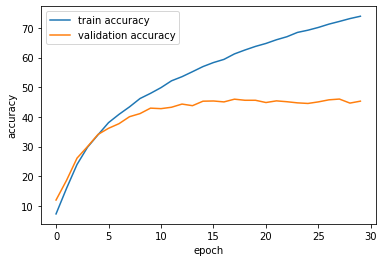

test accuracy 46.43


In [60]:
m1, a1 = experiment(model=ResNet(),num_epochs=30,lr=0.001,modelsavename='resnet_default_30_epochs_trial_1.pth')
torch.save(m1.state_dict(),'resnet_default_30_epochs_trial_1.pth')


============================== working on epoch: 0==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
working on: 6000 th batch
working on: 7000 th batch
working on: 8000 th batch
Train Accuracy after epoch 0: 11.935555555555556 valid accuracy: 18.43
============================== working on epoch: 1==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
working on: 6000 th batch
working on: 7000 th batch
working on: 8000 th batch
Train Accuracy after epoch 1: 25.644444444444446 valid accuracy: 28.95
============================== working on epoch: 2==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch


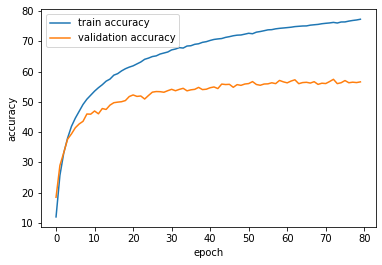

test accuracy 56.71


In [10]:
# add data augmentation
m1, a1 = experiment(trainloader = trainloader_S, validloader = validloader_S, model=ResNet(),num_epochs=80,lr=0.001,modelsavename='resnet_data_augment_dataset_S_80_epochs_trial_1.pth')
torch.save(m1.state_dict(),'resnet_data_augment_dataset_S_80_epochs_trial_1.pth')

============================== working on epoch: 0==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
working on: 6000 th batch
working on: 7000 th batch
working on: 8000 th batch
Train Accuracy after epoch 0: 7.593333333333334 valid accuracy: 14.58
============================== working on epoch: 1==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
working on: 6000 th batch
working on: 7000 th batch
working on: 8000 th batch
Train Accuracy after epoch 1: 18.75888888888889 valid accuracy: 21.48
============================== working on epoch: 2==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
wo

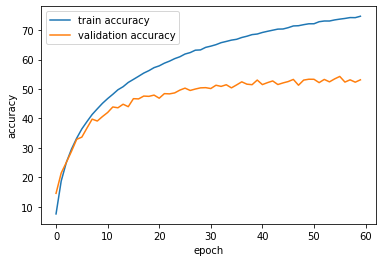

test accuracy 50.52


In [22]:
m2, a2 = experiment(trainloader = trainloader_S, validloader = validloader_S,model=ResNet_GN(),num_epochs=60,lr=0.001,modelsavename='resnet_GN_augment_60_epochs_trial_1.pth')
torch.save(m2.state_dict(),'resnet_GN_augment_60_epochs_trial_1.pth')

============================== working on epoch: 0==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
working on: 6000 th batch
working on: 7000 th batch
working on: 8000 th batch
Train Accuracy after epoch 0: 5.227777777777778 valid accuracy: 11.66
============================== working on epoch: 1==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
working on: 6000 th batch
working on: 7000 th batch
working on: 8000 th batch
Train Accuracy after epoch 1: 17.965555555555557 valid accuracy: 21.39
============================== working on epoch: 2==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
working on: 4000 th batch
working on: 5000 th batch
w

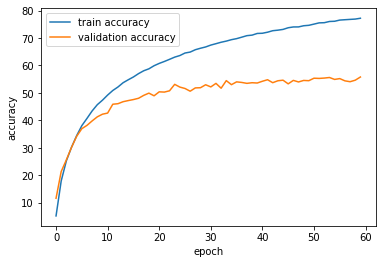

test accuracy 52.89


In [14]:
m2, a2 = experiment(trainloader = trainloader_S, validloader = validloader_S,model=ResNet_GN_G(2),num_epochs=60,lr=0.001,modelsavename='resnet_GN_augment_60_epochs_groupsize_2_trial_1.pth')
torch.save(m2.state_dict(),'resnet_GN_augment_60_epochs_groupsize_2_trial_1.pth')

**Using default ResNet, trainned for 60 epochs, using a batch size of 256 instead of 10**

============================== working on epoch: 0==============================
working on: 0 th batch
Train Accuracy after epoch 0: 11.895555555555555 valid accuracy: 17.51
============================== working on epoch: 1==============================
working on: 0 th batch
Train Accuracy after epoch 1: 23.346666666666668 valid accuracy: 26.0
============================== working on epoch: 2==============================
working on: 0 th batch
Train Accuracy after epoch 2: 30.97888888888889 valid accuracy: 31.7
============================== working on epoch: 3==============================
working on: 0 th batch
Train Accuracy after epoch 3: 36.61666666666667 valid accuracy: 35.22
============================== working on epoch: 4==============================
working on: 0 th batch
Train Accuracy after epoch 4: 41.05222222222222 valid accuracy: 38.05
============================== working on epoch: 5==============================
working on: 0 th batch
Train Accuracy after epoch

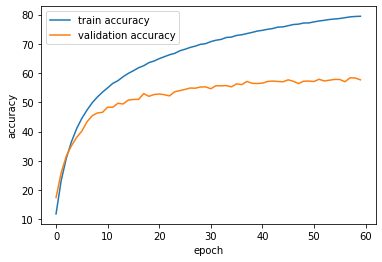

test accuracy 48.56


In [24]:
m3, a3 = experiment(trainloader = trainloader_S_256, validloader = validloader_S_256,model=ResNet(),num_epochs=60,lr=0.001,modelsavename='resnet_basic_augment_60_epochs_bs_256_trial_1.pth')
torch.save(m3.state_dict(),'resnet_basic_augment_60_epochs_bs_256_trial_1.pth')

============================== working on epoch: 0==============================
working on: 0 th batch
Train Accuracy after epoch 0: 14.165714285714285 valid accuracy: 16.82
============================== working on epoch: 1==============================
working on: 0 th batch
Train Accuracy after epoch 1: 25.285714285714285 valid accuracy: 21.67
============================== working on epoch: 2==============================
working on: 0 th batch
Train Accuracy after epoch 2: 32.3 valid accuracy: 25.95
============================== working on epoch: 3==============================
working on: 0 th batch
Train Accuracy after epoch 3: 36.837857142857146 valid accuracy: 28.52
============================== working on epoch: 4==============================
working on: 0 th batch
Train Accuracy after epoch 4: 40.363571428571426 valid accuracy: 30.55
============================== working on epoch: 5==============================
working on: 0 th batch
Train Accuracy after epoch 5: 42.94

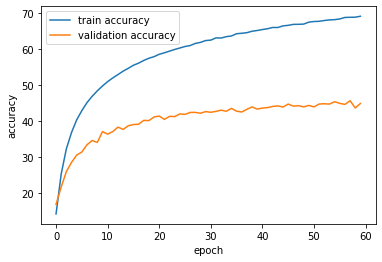

test accuracy 48.46


In [30]:
# train resnet with further enhanced augmentation
m4, a4 = experiment(trainloader = trainloader_SU_256, validloader = validloader_SU_256,model=ResNet(),num_epochs=60,lr=0.001,modelsavename='resnet_augment_SU_60_epochs_bs_256_trial_1.pth')
torch.save(m4.state_dict(),'resnet_augment_SU_60_epochs_bs_256_trial_1.pth')

============================== working on epoch: 0==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 0: 8.0125 valid accuracy: 9.49
============================== working on epoch: 1==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 1: 10.7275 valid accuracy: 10.35
============================== working on epoch: 2==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 2: 12.305 valid accuracy: 12.63
============================== working on epoch: 3==============================
working on: 0 th batch
working on: 1000 th batch
working on: 2000 th batch
working on: 3000 th batch
Train Accuracy after epoch 3: 13.3275 valid accuracy: 8.89
============================== worki

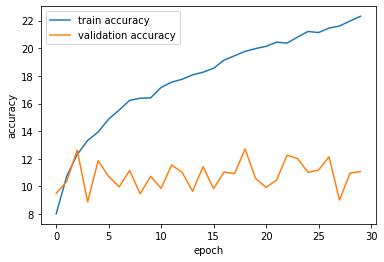

test accuracy 13.01


(MLP(
   (linear1): Linear(in_features=3072, out_features=100, bias=True)
 ), 13.01)

In [34]:
experiment(model = MLP(),trainloader=trainloader,testloader=testloader,num_epochs=30,modelsavename='mlp.pth')

============================== working on epoch: 0==============================
working on: 0 th batch
Train Accuracy after epoch 0: 19.95777777777778 valid accuracy: 28.24
============================== working on epoch: 1==============================
working on: 0 th batch
Train Accuracy after epoch 1: 34.67444444444445 valid accuracy: 36.29
============================== working on epoch: 2==============================
working on: 0 th batch
Train Accuracy after epoch 2: 43.56333333333333 valid accuracy: 41.31
============================== working on epoch: 3==============================
working on: 0 th batch
Train Accuracy after epoch 3: 49.64333333333333 valid accuracy: 44.81
============================== working on epoch: 4==============================
working on: 0 th batch
Train Accuracy after epoch 4: 55.16 valid accuracy: 48.42
============================== working on epoch: 5==============================
working on: 0 th batch
Train Accuracy after epoch 5: 59.68 va

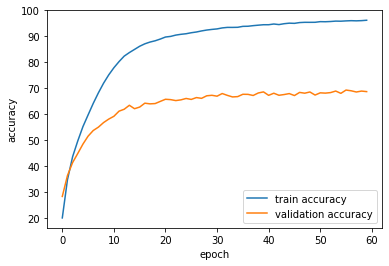

test accuracy 50.36


(CNN2(
   (net): Sequential(
     (0): Conv2d(3, 60, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
     (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (4): Conv2d(60, 120, kernel_size=(3, 3), stride=(1, 1))
     (5): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (6): ReLU()
     (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (8): Conv2d(120, 240, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (9): BatchNorm2d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (10): ReLU()
     (11): Conv2d(240, 320, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (12): BatchNorm2d(320, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (13): ReLU()
     (14): Conv2d(320, 240, kernel_size=(3, 3), stride=(1, 1), padding=same)
   

In [37]:
experiment(model = CNN2(),trainloader=trainloader_S_256,validloader=validloader_S_256,num_epochs=60,modelsavename='mlp.pth')

C
============================== working on epoch: 0==============================
working on: 0 th batch
Train Accuracy after epoch 0: 7.74 valid accuracy: 13.32
============================== working on epoch: 1==============================
working on: 0 th batch
Train Accuracy after epoch 1: 18.39 valid accuracy: 21.62
============================== working on epoch: 2==============================
working on: 0 th batch
Train Accuracy after epoch 2: 25.775 valid accuracy: 25.07
============================== working on epoch: 3==============================
working on: 0 th batch
Train Accuracy after epoch 3: 32.7075 valid accuracy: 27.62
============================== working on epoch: 4==============================
working on: 0 th batch
Train Accuracy after epoch 4: 41.0575 valid accuracy: 28.3
============================== working on epoch: 5==============================
working on: 0 th batch
Train Accuracy after epoch 5: 51.7525 valid accuracy: 27.99
=====================

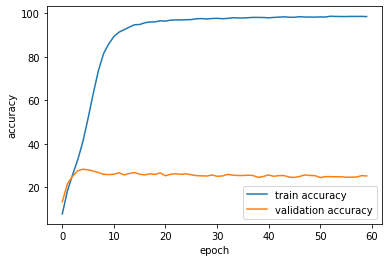

test accuracy 29.0


(CNN1(
   (net): Sequential(
     (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (1): ReLU()
     (2): Dropout(p=0.2, inplace=False)
     (3): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
     (4): ReLU()
     (5): Dropout(p=0.2, inplace=False)
     (6): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=same)
     (7): ReLU()
     (8): Dropout(p=0.2, inplace=False)
     (9): Flatten(start_dim=1, end_dim=-1)
     (10): Linear(in_features=86400, out_features=1024, bias=True)
     (11): ReLU()
     (12): Dropout(p=0.2, inplace=False)
     (13): Linear(in_features=1024, out_features=100, bias=True)
   )
 ), 29.0)

In [40]:
model = CNN1('kaiming_uniform','y',3,0.2)
experiment(model = model, lr = 0.001, trainloader = trainloader_256, validloader = validloader_256,num_epochs = 60,modelsavename = 'cnn1.pth')

In [ ]:
experiment(model = ResNet(),trainloader=trainloader_S_512,validloader=validloader_S_512,num_epochs=100,modelsavename='resnet_augment_512_100.pth')